# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

### Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory('chili-plant-disease/Train',
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='categorical')

Found 400 images belonging to 5 classes.


### Preprocessing the Test set

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('chili-plant-disease/Test',
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 180 images belonging to 5 classes.


### Initialising the CNN

In [4]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

cnn.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

### Training Process

In [5]:
history = cnn.fit(x=training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
13/13 [==============================] - 15s 791ms/step - loss: 2.0744 - accuracy: 0.2150 - val_loss: 1.5177 - val_accuracy: 0.1833
Epoch 2/100
13/13 [==============================] - 6s 443ms/step - loss: 1.5070 - accuracy: 0.2975 - val_loss: 1.4219 - val_accuracy: 0.3667
Epoch 3/100
13/13 [==============================] - 6s 434ms/step - loss: 1.3607 - accuracy: 0.4225 - val_loss: 1.3918 - val_accuracy: 0.4056
Epoch 4/100
13/13 [==============================] - 6s 438ms/step - loss: 1.2607 - accuracy: 0.4550 - val_loss: 1.1152 - val_accuracy: 0.4944
Epoch 5/100
13/13 [==============================] - 6s 435ms/step - loss: 1.3160 - accuracy: 0.4200 - val_loss: 1.1920 - val_accuracy: 0.5056
Epoch 6/100
13/13 [==============================] - 6s 434ms/step - loss: 1.2326 - accuracy: 0.5225 - val_loss: 1.0731 - val_accuracy: 0.5611
Epoch 7/100
13/13 [==============================] - 6s 439ms/step - loss: 1.1143 - accuracy: 0.5275 - val_loss: 1.0008 - val_accuracy: 0.550

Epoch 58/100
13/13 [==============================] - 6s 442ms/step - loss: 0.1363 - accuracy: 0.9550 - val_loss: 0.5836 - val_accuracy: 0.8944
Epoch 59/100
13/13 [==============================] - 6s 438ms/step - loss: 0.0805 - accuracy: 0.9700 - val_loss: 0.5476 - val_accuracy: 0.9000
Epoch 60/100
13/13 [==============================] - 6s 437ms/step - loss: 0.0765 - accuracy: 0.9750 - val_loss: 0.6215 - val_accuracy: 0.9000
Epoch 61/100
13/13 [==============================] - 6s 438ms/step - loss: 0.0467 - accuracy: 0.9825 - val_loss: 0.5777 - val_accuracy: 0.9000
Epoch 62/100
13/13 [==============================] - 6s 428ms/step - loss: 0.0677 - accuracy: 0.9725 - val_loss: 0.5157 - val_accuracy: 0.9000
Epoch 63/100
13/13 [==============================] - 6s 440ms/step - loss: 0.0681 - accuracy: 0.9800 - val_loss: 0.6354 - val_accuracy: 0.9111
Epoch 64/100
13/13 [==============================] - 6s 439ms/step - loss: 0.0557 - accuracy: 0.9825 - val_loss: 0.7087 - val_accuracy:

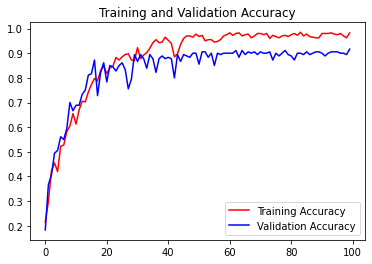

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

<Figure size 432x288 with 0 Axes>

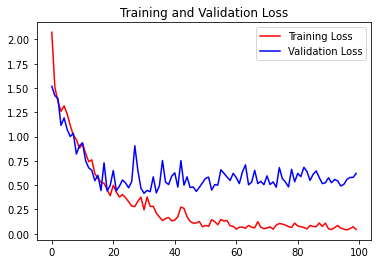

<Figure size 432x288 with 0 Axes>

In [7]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

bercak-daun-pada-tanaman-cabe.jpg
Cabai Yang Terkena Penyakit Bercak Daun


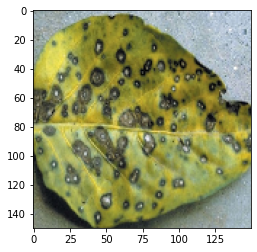

In [9]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
# change it to your filename
fn = 'bercak-daun-pada-tanaman-cabe.jpg'
 
# predicting images
path = fn
img = image.load_img(path, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) 
images = np.vstack([x])
result = cnn.predict(images)


print(fn)
if result[0][0] == 1:
  print('Cabai Dengan Kondisi Sehat')
elif result[0][1] != 0:
  print('Cabai Yang Terkena Penyakit Daun Keriting')
elif result[0][2] != 0:
  print('Cabai Yang Terkena Penyakit Bercak Daun')
elif result[0][3] != 0:
  print('Cabai Yang Terserang Hama Kutu Kebul')
else:
  print('Cabai Yang Terkena Penyakit Daun Kuning')